In [135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [136]:
fortunes = pd.read_csv('fortune500.csv')
fortunes.head(10)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
5,1955,6,Chrysler,2071.6,18.5
6,1955,7,Armour,2056.1,1.6
7,1955,8,Gulf Oil,1705.3,182.8
8,1955,9,Mobil,1703.6,183.8
9,1955,10,DuPont,1687.7,344.4


In [137]:
fortunes.set_index('Rank', inplace=True)
fortunes.head(10)

,Year,Company,Revenue (in millions),Profit (in millions)
Rank,,,,
1,1955,General Motors,9823.5,806
2,1955,Exxon Mobil,5661.4,584.8
3,1955,U.S. Steel,3250.4,195.4
4,1955,General Electric,2959.1,212.6
5,1955,Esmark,2510.8,19.1
6,1955,Chrysler,2071.6,18.5
7,1955,Armour,2056.1,1.6
8,1955,Gulf Oil,1705.3,182.8
9,1955,Mobil,1703.6,183.8


In [138]:
fortunes.shape

(29500, 4)

In [139]:
fortunes.Company.nunique()

2588

In [140]:
fortunes.dtypes

Year                      int64
Company                  object
Revenue (in millions)    object
Profit (in millions)     object
dtype: object

In [141]:
fortunes.columns = ["Year", "Company", "Revenue", "Profit"]
fortunes.head()

,Year,Company,Revenue,Profit
Rank,,,,
1,1955,General Motors,9823.5,806
2,1955,Exxon Mobil,5661.4,584.8
3,1955,U.S. Steel,3250.4,195.4
4,1955,General Electric,2959.1,212.6
5,1955,Esmark,2510.8,19.1


In [142]:
fortunes['Revenue'] = pd.to_numeric(fortunes['Revenue'], errors='coerce')
fortunes['Profit'] = pd.to_numeric(fortunes['Profit'], errors='coerce')
fortunes.dtypes

Year         int64
Company     object
Revenue    float64
Profit     float64
dtype: object

In [143]:
fortunes.isnull().sum()

Year          0
Company       0
Revenue    2000
Profit      804
dtype: int64

In [144]:
fortunes.dropna(inplace=True)
fortunes.isnull().sum()

Year       0
Company    0
Revenue    0
Profit     0
dtype: int64

In [145]:
df_sorted = fortunes.sort_values(by=["Company", "Year"])
df_sorted["Revenue Growth"] = df_sorted.groupby(
    "Company")["Revenue"].pct_change() * 100

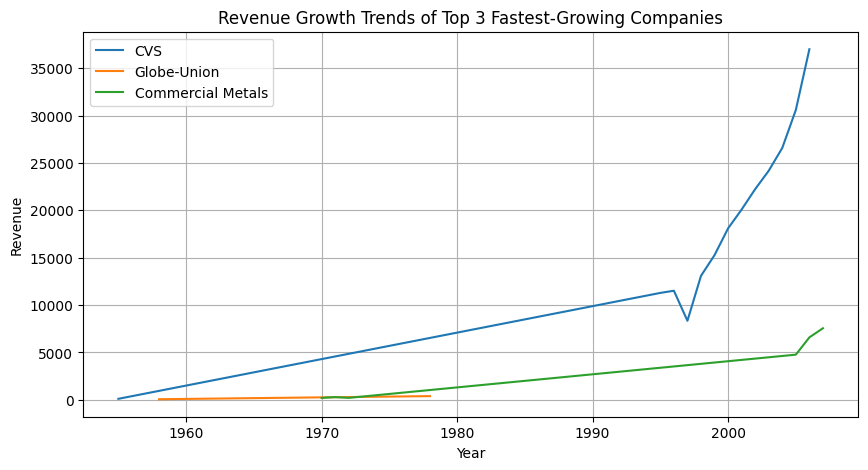

In [146]:
growth_summary = df_sorted.groupby("Company")["Revenue Growth"].mean().dropna()

# Get the top 3 fastest-growing companies
top_3_companies = growth_summary.nlargest(3).index

# Plot revenue trends for the top 3 companies
plt.figure(figsize=(10, 5))

for company in top_3_companies:
    company_data = df_sorted[df_sorted["Company"] == company]
    plt.plot(company_data["Year"], company_data["Revenue"],linestyle="-", label=company)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Revenue Growth Trends of Top 3 Fastest-Growing Companies")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

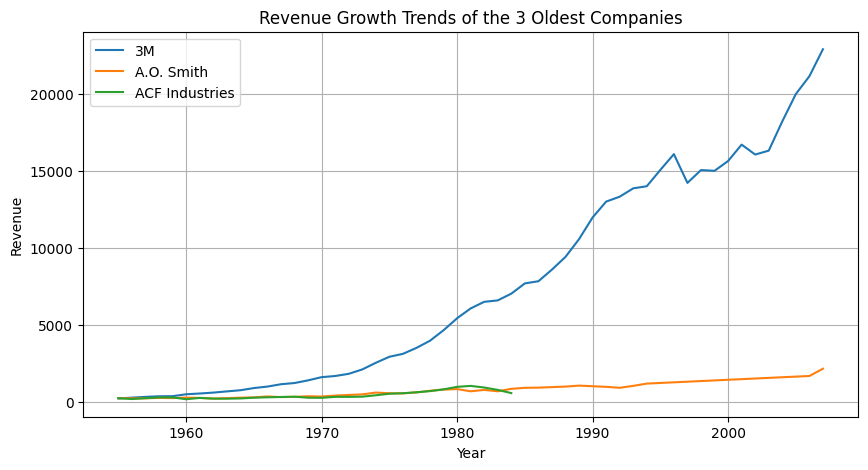

In [ ]:
# Find the oldest companies
oldest_companies = df_sorted.groupby(
    "Company")["Year"].min().nsmallest(3).index

# Plot revenue trends for the top 3 oldest companies
plt.figure(figsize=(10, 5))

for company in oldest_companies:
    company_data = df_sorted[df_sorted["Company"] == company]
    plt.plot(company_data["Year"], company_data["Revenue"], linestyle="-", label=company)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Revenue Growth Trends of the 3 Oldest Companies")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

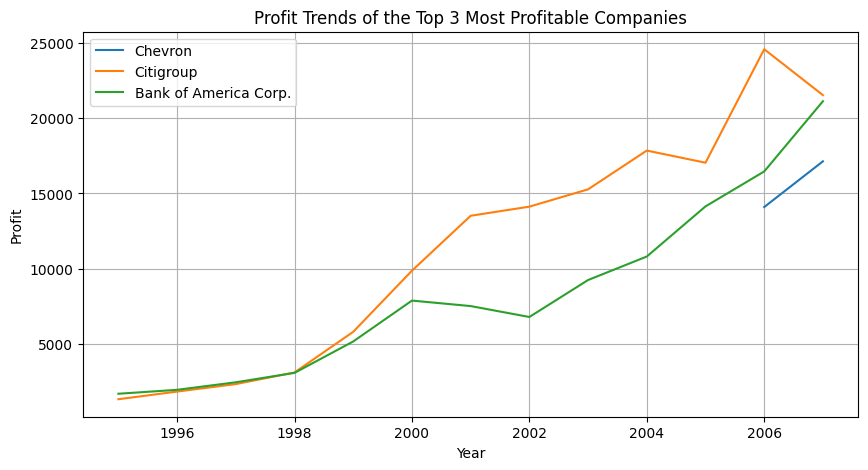

In [148]:
# Convert profit column to numeric, handling errors
fortunes["Profit"] = pd.to_numeric(
    fortunes["Profit"], errors="coerce")

# Find the top 3 most profitable companies based on average profit
top_profitable_companies = fortunes.groupby(
    "Company")["Profit"].mean().nlargest(3).index

# Plot profit trends for the top 3 most profitable companies
plt.figure(figsize=(10, 5))

for company in top_profitable_companies:
    company_data = df_sorted[df_sorted["Company"] == company]
    plt.plot(company_data["Year"], company_data["Profit"], linestyle="-", label=company)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Profit Trends of the Top 3 Most Profitable Companies")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()